<a href="https://colab.research.google.com/github/saikumartech/Smile-and-Unlock/blob/main/DataSet_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Deep Learning Milestone 1 – Dataset Exploration

**Project Title**: Smile and Unlock  
**Dataset**: GENKI-4K (Facial Expression Dataset)  
**Objective**: Perform dataset inspection, visualization, and preprocessing plan before building a deep learning model to classify smiles.



In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("talhasar/genki4k")

print("Path to dataset files:", path)

100%|██████████| 25.0M/25.0M [00:00<00:00, 107MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/talhasar/genki4k/versions/1


In [11]:
import os

# List files and folders
for root, dirs, files in os.walk(path):
    print(f"\n📁 {root}")
    for file in files[:5]:  # Only first 5 to keep it short
        print("   📄", file)



📁 /root/.cache/kagglehub/datasets/talhasar/genki4k/versions/1

📁 /root/.cache/kagglehub/datasets/talhasar/genki4k/versions/1/kaggle-genki4k

📁 /root/.cache/kagglehub/datasets/talhasar/genki4k/versions/1/kaggle-genki4k/smile
   📄 file1141.jpg
   📄 file1529.jpg
   📄 file0184.jpg
   📄 file0358.jpg
   📄 file2132.jpg

📁 /root/.cache/kagglehub/datasets/talhasar/genki4k/versions/1/kaggle-genki4k/non_smile
   📄 file2526.jpg
   📄 file3417.jpg
   📄 file3262.jpg
   📄 file3857.jpg
   📄 file2905.jpg


In [12]:
IMG_DIR = os.path.join(path, "files")   # or just path if images are directly inside
LABEL_FILE = os.path.join(path, "genki4k.txt")  # replace with correct file if different

# Confirm files exist
print("✅ Images folder exists:", os.path.exists(IMG_DIR))
print("✅ Label file exists:", os.path.exists(LABEL_FILE))


✅ Images folder exists: False
✅ Label file exists: False


In [16]:
import os

# Explore full directory structure
for root, dirs, files in os.walk(path):
    print(f"\n📁 {root}")
    for name in files[:10]:  # limit output
        print(f"  📄 {name}")



📁 /root/.cache/kagglehub/datasets/talhasar/genki4k/versions/1

📁 /root/.cache/kagglehub/datasets/talhasar/genki4k/versions/1/kaggle-genki4k

📁 /root/.cache/kagglehub/datasets/talhasar/genki4k/versions/1/kaggle-genki4k/smile
  📄 file1141.jpg
  📄 file1529.jpg
  📄 file0184.jpg
  📄 file0358.jpg
  📄 file2132.jpg
  📄 file0760.jpg
  📄 file1865.jpg
  📄 file0392.jpg
  📄 file0632.jpg
  📄 file1518.jpg

📁 /root/.cache/kagglehub/datasets/talhasar/genki4k/versions/1/kaggle-genki4k/non_smile
  📄 file2526.jpg
  📄 file3417.jpg
  📄 file3262.jpg
  📄 file3857.jpg
  📄 file2905.jpg
  📄 file2655.jpg
  📄 file2943.jpg
  📄 file2475.jpg
  📄 file2708.jpg
  📄 file3678.jpg


In [18]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set base path to kaggle-genki4k
DATASET_PATH = os.path.join(path, "kaggle-genki4k")
SMILE_DIR = os.path.join(DATASET_PATH, "smile")
NO_SMILE_DIR = os.path.join(DATASET_PATH, "non_smile")

def load_and_resize_images(folder, label, target_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg"):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                resized = cv2.resize(img, target_size)
                images.append(resized)
                labels.append(label)
    return images, labels

# Load and resize
smile_images, smile_labels = load_and_resize_images(SMILE_DIR, 1)
no_smile_images, no_smile_labels = load_and_resize_images(NO_SMILE_DIR, 0)

# Combine
X = np.array(smile_images + no_smile_images)
y = np.array(smile_labels + no_smile_labels)

print(f"✅ Loaded {len(X)} images. Shape: {X[0].shape}")
print(f"🔢 Label distribution: {np.bincount(y)}")


✅ Loaded 4000 images. Shape: (64, 64)
🔢 Label distribution: [1838 2162]


## 1. Dataset Summary

- **Source**: GENKI-4K via Kaggle (talhasar/genki4k)  
- **Type**: Grayscale facial images  
- **Task**: Binary classification — Smiling (1) vs Not Smiling (0)  
- **Input**: 64×64 grayscale image  
- **Output**: Binary label (0 or 1)


In [19]:
print("Number of samples:", len(X))
print("Image shape:", X[0].shape)
print("Label shape:", y.shape)
print("Label counts (0 = No Smile, 1 = Smile):", np.bincount(y))


Number of samples: 4000
Image shape: (64, 64)
Label shape: (4000,)
Label counts (0 = No Smile, 1 = Smile): [1838 2162]


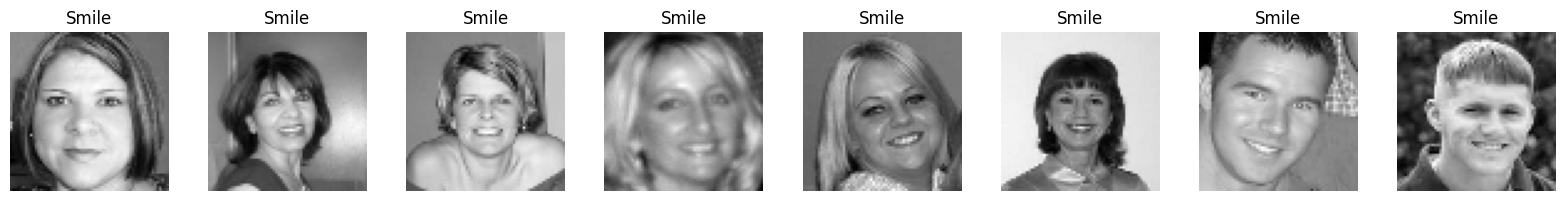

In [20]:
def show_samples(images, labels, n=8):
    plt.figure(figsize=(16, 2))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title("Smile" if labels[i] == 1 else "No Smile")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_samples(X, y)


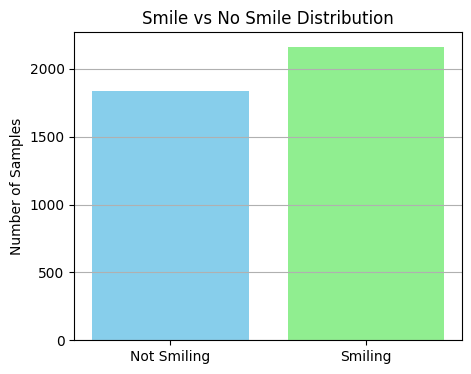

In [21]:
plt.figure(figsize=(5, 4))
plt.bar(['Not Smiling', 'Smiling'], np.bincount(y), color=['skyblue', 'lightgreen'])
plt.title("Smile vs No Smile Distribution")
plt.ylabel("Number of Samples")
plt.grid(axis='y')
plt.show()


## 3. Distribution Visualization

This bar chart shows how many smiling vs. non-smiling samples are in the dataset.  
Balanced datasets are important for training unbiased models.


## 4. Initial Insights & Preprocessing Plan

### 🔍 Challenges
- Variations in lighting, pose, and resolution
- Image sizes were inconsistent — fixed by resizing to 64×64
- Some class imbalance may exist

### ⚙️ Preprocessing Plan
- Normalize pixel values to [0, 1]
- Reshape images to (64, 64, 1) for CNNs
- Apply 80/20 train-test split
- Consider data augmentation during model training


In [22]:
from sklearn.model_selection import train_test_split

# Normalize to [0, 1]
X_norm = X / 255.0

# Reshape for CNN
X_ready = X_norm.reshape(-1, 64, 64, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_ready, y, test_size=0.2, random_state=42)

print(f"✅ X_train shape: {X_train.shape}, y_train: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test: {y_test.shape}")


✅ X_train shape: (3200, 64, 64, 1), y_train: (3200,)
✅ X_test shape: (800, 64, 64, 1), y_test: (800,)


# ✅ Milestone 1 Complete – Deliverables Checklist

- [x] Dataset Summary
- [x] Dataset Loaded (images + labels)
- [x] Sample Images Displayed
- [x] Class Distribution Visualized
- [x] Preprocessing Plan Documented
- [x] Data Normalized and Split
